In [360]:
from gensim.models import Word2Vec
import pandas as pd
import jieba
import numpy as np
import re
pd.options.display.max_rows = 500
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import matplotlib
import random

from langconv import *
 
def simple2tradition(line):
    line = Converter('zh-hant').convert(line)
    return line
    
def tradition2simple(line):
    line = Converter('zh-hans').convert(line)
    return line

def FlushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()
 

In [773]:
from gensim.models import KeyedVectors
from sklearn import preprocessing
from scipy import spatial

#import warnings
#warnings.filterwarnings("ignore")

# 1. load the model and text

In [158]:
model_merge = KeyedVectors.load_word2vec_format('/users/zhengyiliang/Desktop/data&code/douban_book_collections/sgns.merge.bigram')

In [47]:
len(model_merge.wv.vocab)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


1285406

# 2. Project countries to different dimensions

In [ ]:
# project 特别的词  国家

## 2.1 construct multiple dimensions

In [405]:
model_merge.similarity('改革','守旧')

0.35055076724972334

In [432]:
model_merge.similarity('男','女')

0.8308389673259812

In [425]:
model_merge.similarity('社会主义','公有制')

0.5892854265962586

## 2.1.1 individualism_collectivism_dimension

In [1119]:
list1 = [normalize( model_merge['个人'] - model_merge['集体'])]
list2 = normalize(model_merge['个人主义'] - model_merge['集体主义'])
list3 = normalize(model_merge['个人利益'] - model_merge['集体利益'])
#list4 = normalize(model_merge['个体'] - model_merge['国家'])

In [1120]:
list1.append(list2)

In [1121]:
list1.append(list3)

In [1118]:
list1.append(list4)

In [289]:
#list1

In [1122]:
indiv_collect_dim = normalize(np.mean(list1, axis = 0))

In [330]:
np.sum(indiv_collect_dim **2, axis = 0)

1.0000001

In [331]:
indiv_collect_dim.shape

(300,)

In [322]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

In [306]:
#def normalize(v):
    #norm = preprocessing.normalize(v, norm = 'l2')
    #return norm

def calculate_similarity(WordList, dim_vec):
    gprojection = defaultdict(float)
    try:
        for w in WordList:
            try:
                wv = normalize(model_merge.wv[w])
                gprojection[w] = 1 - spatial.distance.cosine(wv, dim_vec)  # cosine similarity
            except:
                print(w)
    except:
        raise
    return sorted([(cosine2angle(v), k) for k, v in gprojection.items()], reverse = True)

def cosine2angle(i):
    return np.arccos(i) / np.pi * 180

def rescaler(x):
    return (x - min(x)) / (max(x) - min(x)) * 180

In [1123]:
wordlist = ['中国','俄罗斯','美国','英国','法国','日本','朝鲜','德国','澳大利亚','加拿大','古巴','集体主义','个人主义']
# '集体','个人'

In [332]:
wv = normalize(model_merge['中国'])

In [345]:
wv = normalize(model_merge['法国'])

In [333]:
wv.shape

(300,)

In [334]:
1 - spatial.distance.cosine(wv, indiv_collect_dim)

-0.12077456712722778

In [346]:
1 - spatial.distance.cosine(wv, indiv_collect_dim)

-0.04512378200888634

In [1124]:
cs = calculate_similarity(wordlist, indiv_collect_dim)

In [1125]:
cs

[(107.98468800931967, '集体主义'),
 (96.44876177793864, '朝鲜'),
 (93.3477572334487, '俄罗斯'),
 (93.24083363920639, '古巴'),
 (91.5101718348364, '中国'),
 (91.45025780352375, '日本'),
 (91.37572524139725, '德国'),
 (91.1204666853507, '澳大利亚'),
 (89.12000096897115, '加拿大'),
 (88.91735774246688, '法国'),
 (88.50720714538907, '英国'),
 (87.69615406743232, '美国'),
 (75.01672266085654, '个人主义')]

In [1126]:
r = np.array([i for i,j in cs])
r = rescaler(r)

In [1127]:
s = [j for i,j in cs]

In [1128]:
ss = [(i, s[k]) for k,i in enumerate(r)]

In [1129]:
ss

[(180.0, '集体主义'),
 (117.0156241156877, '朝鲜'),
 (100.08461814949116, '俄罗斯'),
 (99.50083183571084, '古巴'),
 (90.05168562684054, '中国'),
 (89.72456426759723, '日本'),
 (89.3176279874547, '德国'),
 (87.92395568761047, '澳大利亚'),
 (77.0017217813829, '加拿大'),
 (75.89532105615676, '法国'),
 (73.6559621301912, '英国'),
 (69.2277375646427, '美国'),
 (0.0, '个人主义')]

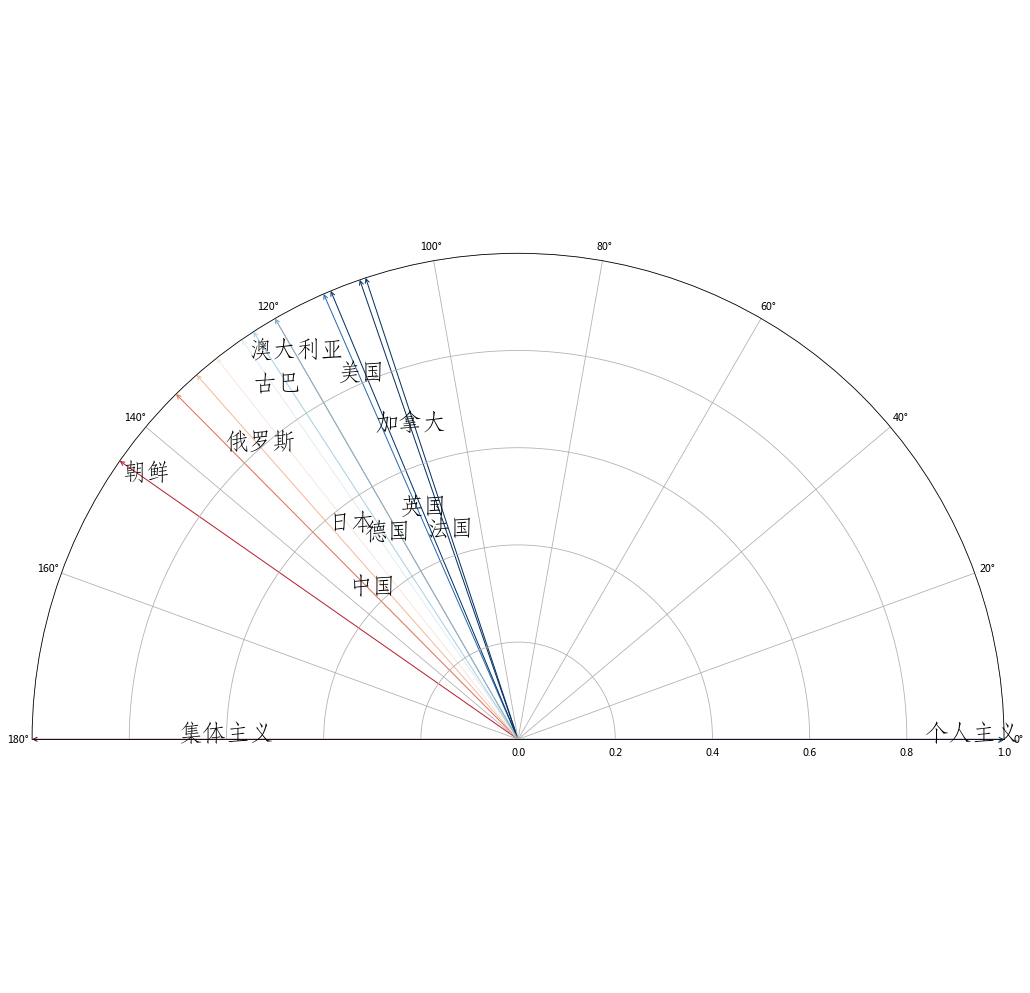

In [505]:
fig = plt.figure(figsize = (15, 15), facecolor = 'white')
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar = True, facecolor = 'white', xlabel = 'Individualism', ylabel = 'Collectivisim')

font = matplotlib.font_manager.FontProperties(fname = r"/Library/Fonts/华文仿宋.ttf", size = 24)

cmap = plt.get_cmap('RdBu', 10)
for k, (g, s) in enumerate(ss):
    ax.annotate('',
                xy=(0, 0), xycoords='data',
                xytext=(g/180*np.pi, 1), textcoords='data',
                arrowprops=dict(arrowstyle="<-", #linestyle="dashed",
                                color=cmap(k),
                                alpha=1,
                                shrinkA=0, shrinkB=0,
                                patchA=None,
                                patchB=None,
                                connectionstyle='arc3',
                                ),zorder=1
                )
  
               # xy = (0, 0), xytext = (g/180*np.pi), 1), arrowprops = dict(arrowstyle = '<-',shrinkA = 0, shrinkB = 0,patchA = None, connectionstyle= 'arc3'),)
    ax.text(g/180*np.pi, 1- 0.7*random.random(), str(s), fontproperties = font, ha = 'center', color = 'black')
    
ax.set_thetamin(0)
ax.set_thetamax(180)


plt.show()
#fig.savefig('/users/zhengyiliang/Desktop/countries_indiv_collect_dim.jpg', bbox_inches='tight')

## 2.1.2 lbr_cov dim (liberal-conservative)

In [435]:
words = [['自由','保守'] ,['自由主义' ,'保守主义'],['自由派' ,'保守派']]

In [437]:
dim = []
for i in words:
    dim1 = normalize(model_merge[i[0]] - model_merge[i[1]])
    dim.append(dim1)
lbr_cov_dim = normalize(np.mean(dim, axis = 0))

In [532]:
lbr_cov_dim.shape

(300,)

In [439]:
np.sum(lbr_cov_dim **2, axis = 0)

1.0000001

In [533]:
wordlist = ['中国','俄罗斯','美国','英国','法国','日本','朝鲜','德国','澳大利亚','加拿大','古巴','自由','保守']
# '集体','个人'

In [534]:
cs = calculate_similarity(wordlist, lbr_cov_dim)

In [535]:
cs

[(116.60394763125291, '保守'),
 (91.68448693566067, '澳大利亚'),
 (91.55052938313138, '俄罗斯'),
 (91.3719660626297, '中国'),
 (91.32826419727161, '英国'),
 (91.29529242245296, '日本'),
 (89.63891453669423, '朝鲜'),
 (88.41153976477224, '美国'),
 (87.73591985722932, '德国'),
 (87.59583957739623, '法国'),
 (87.56000520558015, '古巴'),
 (85.94674564304378, '加拿大'),
 (66.2226118176836, '自由')]

In [536]:
r = np.array([i for i,j in cs])
r = rescaler(r)

In [537]:
s = [j for i,j in cs]

In [538]:
ss = [(i, s[k]) for k,i in enumerate(r)]

In [539]:
ss

[(180.0, '保守'),
 (90.9689560077422, '澳大利亚'),
 (90.49035894266042, '俄罗斯'),
 (89.85239654703761, '中国'),
 (89.69626063604143, '英国'),
 (89.57846067358474, '日本'),
 (83.6606338708212, '朝鲜'),
 (79.27552864527743, '美国'),
 (76.86170651464286, '德国'),
 (76.36123446556383, '法国'),
 (76.23320715499861, '古巴'),
 (70.4694314121106, '加拿大'),
 (0.0, '自由')]

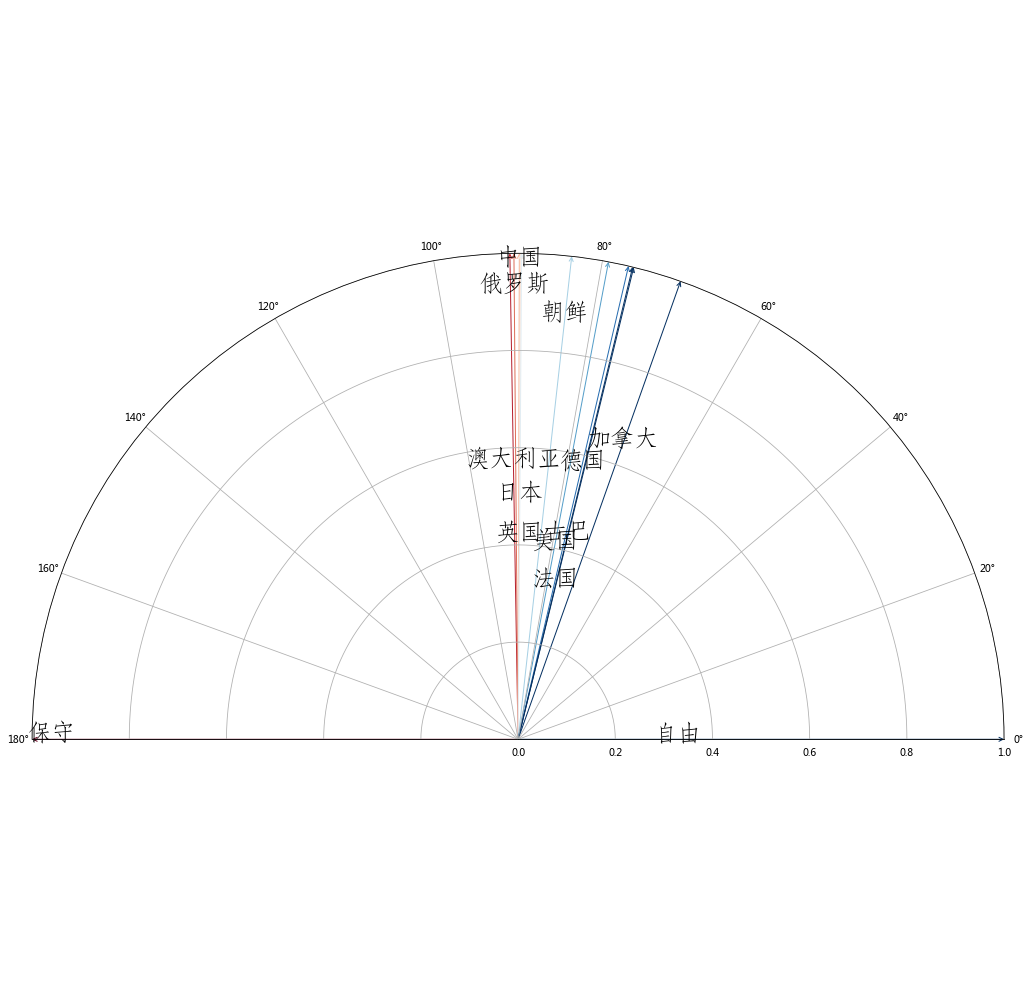

In [541]:
fig = plt.figure(figsize = (15, 15), facecolor = 'white')
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar = True, facecolor = 'white', xlabel = 'Individualism', ylabel = 'Collectivisim')

font = matplotlib.font_manager.FontProperties(fname = r"/Library/Fonts/华文仿宋.ttf", size = 24)

cmap = plt.get_cmap('RdBu', 10)
for k, (g, s) in enumerate(ss):
    ax.annotate('',
                xy=(0, 0), xycoords='data',
                xytext=(g/180*np.pi, 1), textcoords='data',
                arrowprops=dict(arrowstyle="<-", #linestyle="dashed",
                                color=cmap(k),
                                alpha=1,
                                shrinkA=0, shrinkB=0,
                                patchA=None,
                                patchB=None,
                                connectionstyle='arc3',
                                ),zorder=1
                )
  
               # xy = (0, 0), xytext = (g/180*np.pi), 1), arrowprops = dict(arrowstyle = '<-',shrinkA = 0, shrinkB = 0,patchA = None, connectionstyle= 'arc3'),)
    ax.text(g/180*np.pi, 1- 0.7*random.random(), str(s), fontproperties = font, ha = 'center', color = 'black')
    
ax.set_thetamin(0)
ax.set_thetamax(180)


plt.show()
fig.savefig('/users/zhengyiliang/Desktop/countries_lbr_cov_dim.jpg', bbox_inches='tight')

## 2.1.3 socialism_capitlism_dimension

In [506]:
sc_words = [['资本主义','社会主义']]

In [507]:
wordlist = ['中国','俄罗斯','美国','英国','法国','日本','朝鲜','德国','澳大利亚','加拿大','古巴']
# '集体','个人' , '社会主义','资本主义'

In [449]:
sc_dim = []
for i in sc_words:
    dim1 = normalize(model_merge[i[0]] - model_merge[i[1]])
    sc_dim.append(dim1)
soc_cap_dim = normalize(np.mean(sc_dim, axis = 0))

In [450]:
soc_cap_dim.shape

(300,)

In [451]:
np.sum(soc_cap_dim **2, axis = 0)

0.9999999

In [508]:
cs = calculate_similarity(wordlist, soc_cap_dim)

In [509]:
cs

[(93.19084865461815, '中国'),
 (92.64038550292707, '朝鲜'),
 (89.44789621964428, '古巴'),
 (89.34101757151228, '俄罗斯'),
 (87.03568062264114, '加拿大'),
 (87.03411936509437, '澳大利亚'),
 (83.2105222205043, '美国'),
 (81.97182583226683, '德国'),
 (80.64200868855696, '法国'),
 (80.32727837335077, '日本'),
 (77.25991511839096, '英国')]

In [510]:
r = np.array([i for i,j in cs])
r = rescaler(r)

In [511]:
s = [j for i,j in cs]

In [512]:
ss = [(i, s[k]) for k,i in enumerate(r)]

In [513]:
ss

[(180.0, '中国'),
 (173.78044186305362, '朝鲜'),
 (137.70923048776635, '古巴'),
 (136.50163291540744, '俄罗斯'),
 (110.45415428817074, '加拿大'),
 (110.43651399372226, '澳大利亚'),
 (67.2345582225098, '美国'),
 (53.23880904838148, '德国'),
 (38.213507152327935, '法国'),
 (34.65744079825722, '日本'),
 (0.0, '英国')]

In [473]:
ss

[(180.0, '中国'),
 (173.78044186305362, '朝鲜'),
 (137.70923048776635, '古巴'),
 (136.50163291540744, '俄罗斯'),
 (110.45415428817074, '加拿大'),
 (110.43651399372226, '澳大利亚'),
 (67.2345582225098, '美国'),
 (53.23880904838148, '德国'),
 (38.213507152327935, '法国'),
 (34.65744079825722, '日本'),
 (0.0, '英国')]

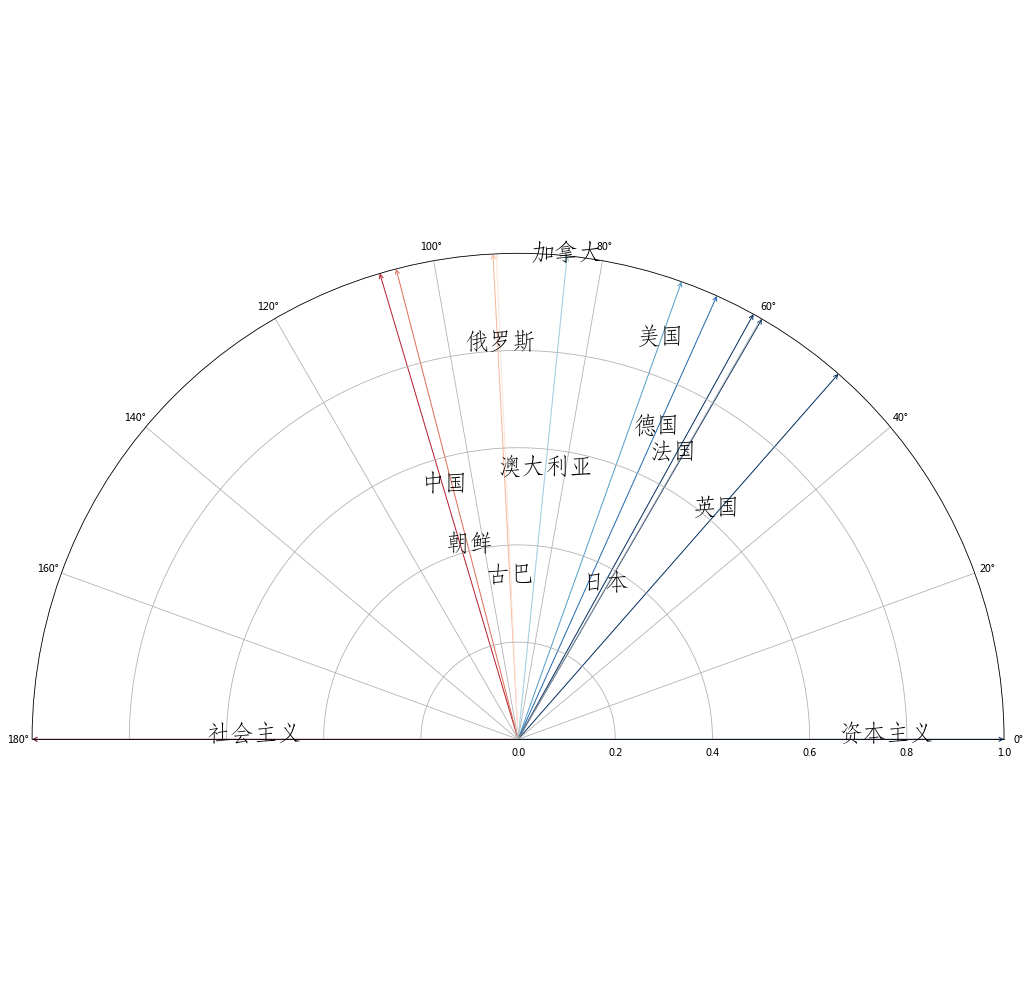

In [493]:
fig = plt.figure(figsize = (15, 15), facecolor = 'white')
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar = True, facecolor = 'white', xlabel = 'Individualism', ylabel = 'Collectivisim')

font = matplotlib.font_manager.FontProperties(fname = r"/Library/Fonts/华文仿宋.ttf", size = 24)

cmap = plt.get_cmap('RdBu', 10)
for k, (g, s) in enumerate(ss):
    ax.annotate('',
                xy=(0, 0), xycoords='data',
                xytext=(g/180*np.pi, 1), textcoords='data',
                arrowprops=dict(arrowstyle="<-", #linestyle="dashed",
                                color=cmap(k),
                                alpha=1,
                                shrinkA=0, shrinkB=0,
                                patchA=None,
                                patchB=None,
                                connectionstyle='arc3',
                                ),zorder=1
                )
    #ax.annotate('',
               # xy = (0, 0), xytext = (g/180*np.pi), 1), arrowprops = dict(arrowstyle = '<-',shrinkA = 0, shrinkB = 0,patchA = None, connectionstyle= 'arc3'),)
    ax.text(g/180*np.pi, 1- 0.7*random.random(), str(s), fontproperties = font, ha = 'center', color = 'black')
    
ax.set_thetamin(0)
ax.set_thetamax(180)


plt.show()
#fig.savefig('/users/zhengyiliang/Desktop/countries_soc_cap_dim.jpg', bbox_inches='tight')

In [516]:
sc_words2 = [['资本主义','社会主义'], ['市场经济', '计划经济'], ['私有制', '公有制']]

In [524]:
wordlist = ['中国','俄罗斯','美国','英国','法国','日本','朝鲜','德国','澳大利亚','加拿大','古巴', '社会主义','资本主义']
# '集体','个人' , '社会主义','资本主义'

In [517]:
sc_dim2 = []
for i in sc_words2:
    dim1 = normalize(model_merge[i[0]] - model_merge[i[1]])
    sc_dim2.append(dim1)
soc_cap_dim2 = normalize(np.mean(sc_dim2, axis = 0))

In [525]:
cs = calculate_similarity(wordlist, soc_cap_dim2)

In [526]:
cs

[(102.55764438286695, '社会主义'),
 (96.42660752824631, '朝鲜'),
 (95.1778644246644, '中国'),
 (94.63056242226457, '俄罗斯'),
 (93.06187922594223, '古巴'),
 (89.56372710930981, '加拿大'),
 (89.5339540039241, '澳大利亚'),
 (87.4054630193687, '德国'),
 (86.19229836080984, '日本'),
 (84.96527792461728, '美国'),
 (83.10460423991513, '法国'),
 (81.98096099138678, '英国'),
 (73.93285277852698, '资本主义')]

In [527]:
r = np.array([i for i,j in cs])
r = rescaler(r)

In [528]:
s = [j for i,j in cs]

In [529]:
ss = [(i, s[k]) for k,i in enumerate(r)]

In [530]:
ss

[(180.0, '社会主义'),
 (141.4464744726947, '朝鲜'),
 (133.59405892495448, '中国'),
 (130.1524841601959, '俄罗斯'),
 (120.28820360084993, '古巴'),
 (98.29092970983689, '加拿大'),
 (98.10370881951549, '澳大利亚'),
 (84.71921392027986, '德国'),
 (77.0905247211073, '日本'),
 (69.37470685359227, '美国'),
 (57.67431553281816, '法国'),
 (50.60855982249752, '英国'),
 (0.0, '资本主义')]

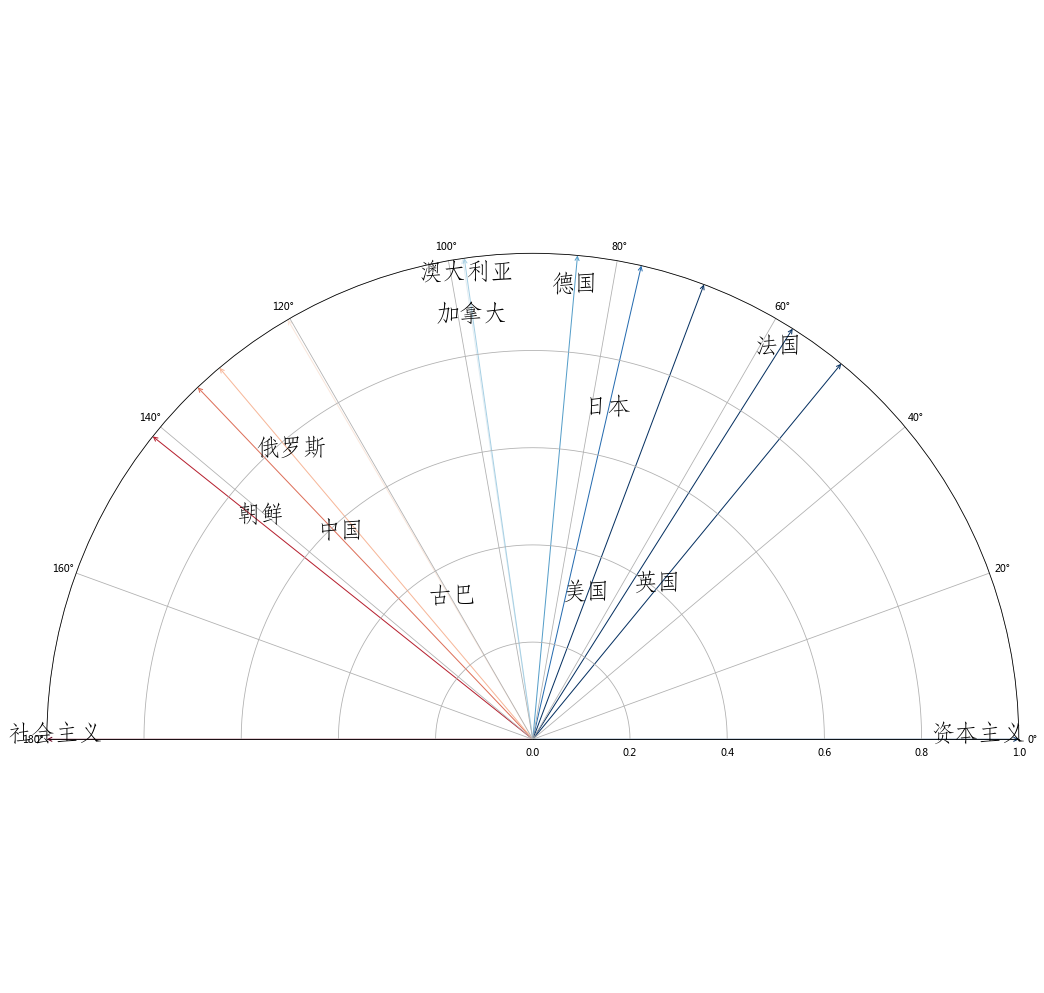

In [531]:
fig = plt.figure(figsize = (15, 15), facecolor = 'white')
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar = True, facecolor = 'white', xlabel = 'Individualism', ylabel = 'Collectivisim')

font = matplotlib.font_manager.FontProperties(fname = r"/Library/Fonts/华文仿宋.ttf", size = 24)

cmap = plt.get_cmap('RdBu', 10)
for k, (g, s) in enumerate(ss):
    ax.annotate('',
                xy=(0, 0), xycoords='data',
                xytext=(g/180*np.pi, 1), textcoords='data',
                arrowprops=dict(arrowstyle="<-", #linestyle="dashed",
                                color=cmap(k),
                                alpha=1,
                                shrinkA=0, shrinkB=0,
                                patchA=None,
                                patchB=None,
                                connectionstyle='arc3',
                                ),zorder=1
                )
    #ax.annotate('',
               # xy = (0, 0), xytext = (g/180*np.pi), 1), arrowprops = dict(arrowstyle = '<-',shrinkA = 0, shrinkB = 0,patchA = None, connectionstyle= 'arc3'),)
    ax.text(g/180*np.pi, 1- 0.7*random.random(), str(s), fontproperties = font, ha = 'center', color = 'black')
    
ax.set_thetamin(0)
ax.set_thetamax(180)


plt.show()
#fig.savefig('/users/zhengyiliang/Desktop/countries_soc_cap_dim.jpg', bbox_inches='tight')